In [ ]:

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/content/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam


In [ ]:
BASE_DIR = '/content/utkface-new/UTKFace'

In [55]:
image_paths = []
age_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    image_paths.append(image_path)
    age_labels.append(age)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [26]:
df = pd.DataFrame({'image': image_paths, 'age': age_labels})

In [29]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128))
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [30]:
X = extract_features(df['image'])
X = X / 255.0

  0%|          | 0/23708 [00:00<?, ?it/s]

In [31]:
y_age = np.array(df['age'])

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y_age, test_size=0.2, random_state=42)

In [38]:
input_shape = (128, 128, 1)
inputs = Input(shape=input_shape)

conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(maxp_4)
dense_1 = Dense(256, activation='relu')(flatten)
dropout_1 = Dropout(0.3)(dense_1)
output = Dense(1, activation='relu', name='age_out')(dropout_1)

model = Model(inputs=[inputs], outputs=[output])
model.compile(loss='mae', optimizer=Adam(), metrics=['mae'])


In [39]:
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - loss: 16.6655 - mae: 16.6655 - val_loss: 13.1122 - val_mae: 13.1122
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 12.2646 - mae: 12.2646 - val_loss: 11.5877 - val_mae: 11.5877
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 9.8742 - mae: 9.8742 - val_loss: 9.9320 - val_mae: 9.9320
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 8.7371 - mae: 8.7371 - val_loss: 7.6300 - val_mae: 7.6300
Epoch 5/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 7.9078 - mae: 7.9078 - val_loss: 8.0622 - val_mae: 8.0622
Epoch 6/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 7.3154 - mae: 7.3154 - val_loss: 7.1247 - val_mae: 7.1247
Epoch 7/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 6.9256 - mae: 6.9256 - val_loss: 7.0237 - val_mae: 7.0237
Epoch 8/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 6.6930 - mae: 6.6930 - val_loss: 6.8999 - val_mae: 6.8999
Epoch 9/30
593/593 ━━━━━━━━━━━━━

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R2): {r2}")

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Absolute Error (MAE): 6.760474343206348
Mean Squared Error (MSE): 89.87899274940087
Root Mean Squared Error (RMSE): 9.480453193249827
R-squared Score (R2): 0.7739139139614051


Original Age: 63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Age: 61


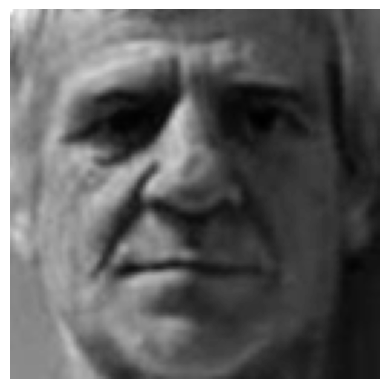

In [53]:
image_index = 44
print("Original Age:", y_age[image_index])

pred_age = round(model.predict(X[image_index].reshape(1, 128, 128, 1))[0][0])
print("Predicted Age:", pred_age)

plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Age: 44
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Age: 48


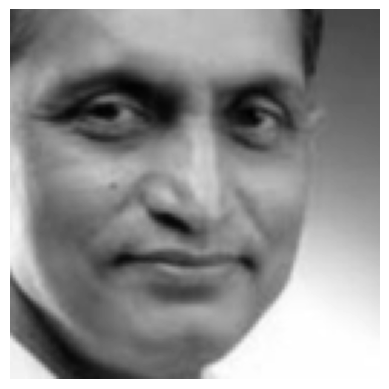

In [52]:
image_index = 5
print("Original Age:", y_age[image_index])

pred_age = round(model.predict(X[image_index].reshape(1, 128, 128, 1))[0][0])
print("Predicted Age:", pred_age)

plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Age: 54
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Age: 50


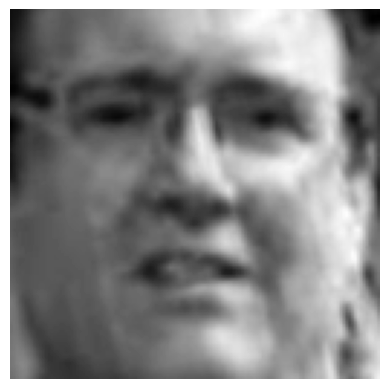

In [54]:
image_index = 200
print("Original Age:", y_age[image_index])

pred_age = round(model.predict(X[image_index].reshape(1, 128, 128, 1))[0][0])
print("Predicted Age:", pred_age)

plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');